In [1]:
import sys

sys.path.append('../../')

In [2]:
from models import Sequential
from datasets import load_mnist

X_train, y_train, X_val, y_val, X_test, y_test =load_mnist()

/Users/pvrancx/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [45]:
from lasagne.layers import DenseLayer, DropoutLayer, Conv2DLayer, NonlinearityLayer, BiasLayer, InverseLayer 
from lasagne.nonlinearities import rectify, softmax
from lasagne.objectives import categorical_crossentropy
from lasagne.updates import nesterov_momentum

import theano.tensor as T

#create the model
cae = Sequential(input_shape=(None,)+X_train.shape[1:],input_var = T.tensor4('inputs'), 
                 output_var = T.tensor4('output'))
#add layers

#encoder:
#2 convolutional layers + dense encoding layer 

#first convlayer
l1=cae.add(Conv2DLayer,num_filters=8,
            filter_size=(8, 8),
            stride=(4, 4),nonlinearity=None,b=None)

#separate bias and activation so we don't include them in the inverse layers (see decoder)
cae.add(BiasLayer)
cae.add(NonlinearityLayer,nonlinearity=rectify)

#second convlayer
l2=cae.add(Conv2DLayer,num_filters=16,
            filter_size=(4, 4),
            stride=(2, 2),nonlinearity=None,b=None)
cae.add(BiasLayer)
cae.add(NonlinearityLayer,nonlinearity=rectify)

#final dense encoding
l3=cae.add(DenseLayer,num_units=64,nonlinearity=None,b=None)
cae.add(BiasLayer)
cae.add(NonlinearityLayer,nonlinearity=rectify)

#decoder:
#use lasagne's inverselayer to decode 

#inverse for dense encoding layer
cae.add(InverseLayer,layer=l3)
cae.add(BiasLayer)
cae.add(NonlinearityLayer,nonlinearity=rectify)

#deconvolve 1
cae.add(InverseLayer,layer=l2)
cae.add(BiasLayer)
cae.add(NonlinearityLayer,nonlinearity=rectify)

#deconvolve 2
cae.add(InverseLayer,layer=l1)
cae.add(BiasLayer)
cae.add(NonlinearityLayer,nonlinearity=rectify)

In [46]:
from lasagne.objectives import squared_error
cae.compile(loss_fn = squared_error,
              optimizer = nesterov_momentum, learning_rate=0.05, momentum=0.9)
cae.fit(X_train,X_train,validation_data=(X_val,X_val),n_epochs=100)

Epoch 1 of 100 took 5.717s
  training loss:		0.062292
  validation loss:		0.041379
Epoch 2 of 100 took 6.215s
  training loss:		0.034444
  validation loss:		0.029308
Epoch 3 of 100 took 6.200s
  training loss:		0.026283
  validation loss:		0.023939
Epoch 4 of 100 took 6.186s
  training loss:		0.022312
  validation loss:		0.020843
Epoch 5 of 100 took 5.719s
  training loss:		0.019756
  validation loss:		0.018668
Epoch 6 of 100 took 6.320s
  training loss:		0.017844
  validation loss:		0.017022
Epoch 7 of 100 took 5.701s
  training loss:		0.016481
  validation loss:		0.015903
Epoch 8 of 100 took 5.437s
  training loss:		0.015535
  validation loss:		0.015106
Epoch 9 of 100 took 5.390s
  training loss:		0.014836
  validation loss:		0.014493
Epoch 10 of 100 took 5.370s
  training loss:		0.014291
  validation loss:		0.014009
Epoch 11 of 100 took 5.815s
  training loss:		0.013839
  validation loss:		0.013595
Epoch 12 of 100 took 5.680s
  training loss:		0.013456
  validation loss:		0.013247
E

In [47]:
#apply autoencoder on test set
pred = cae.predict(X_test)

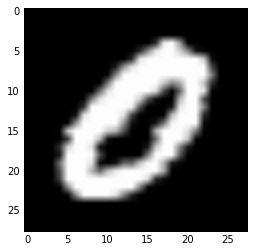

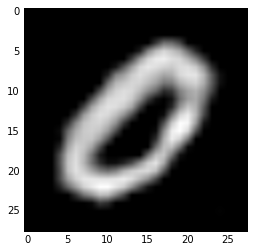

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#randomly sample image and show reconstruction
ind = np.random.randint(X_test.shape[0])
plt.figure()
plt.imshow(X_test[ind,0,],cmap='gray')
plt.figure()
plt.imshow(pred[ind,0,],cmap='gray')